In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
num_classes = len(np.unique(y_train))
print(num_classes)

10


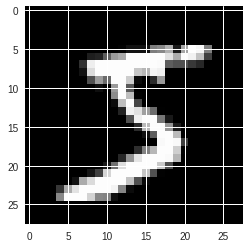

5


In [0]:
plt.imshow(x_train[0], cmap='gray')
plt.show()
print(y_train[0])

In [0]:
X_train = x_train.reshape(-1, 28, 28, 1)
X_test = x_test.reshape(-1, 28, 28, 1)

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

print(y_train.shape)
print(Y_train.shape)

(60000,)
(60000, 10)


In [0]:
print(Y_train[122])
print(y_train[122])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
2


In [0]:
X_train = X_train[:3600]
Y_train = Y_train[:3600]

X_test = X_train[:900]
Y_test = Y_train[:900]

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3600, 28, 28, 1)
(900, 28, 28, 1)
(3600, 10)
(900, 10)


In [0]:
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Convolution2D, MaxPooling2D

from keras.models import Sequential

In [0]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model.add(Activation('relu'))

# 26x26 x 32

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))

# 24x24 x 64

model.add(MaxPooling2D(pool_size=(2, 2)))

# 12x12 x 64

model.add(Convolution2D(16, 3, 3))
model.add(Activation('relu'))

# 10x10 x 16

model.add(Flatten())

# 1600

model.add(Dropout(0.25))

# model.add(Dense(1600))
# model.add(Activation('relu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
activation_6 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 16)        9232      
_________________________________________________________________
activation_7 (Activation)    (None, 10, 10, 16)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`


In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test),
         nb_epoch=12,
         batch_size=16,
         verbose=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 3600 samples, validate on 900 samples
Epoch 1/12
 - 2s - loss: 4.9292 - acc: 0.5536 - val_loss: 0.3248 - val_acc: 0.9044
Epoch 2/12
 - 2s - loss: 0.3402 - acc: 0.8936 - val_loss: 0.1859 - val_acc: 0.9422
Epoch 3/12
 - 2s - loss: 0.1974 - acc: 0.9408 - val_loss: 0.0742 - val_acc: 0.9822
Epoch 4/12
 - 2s - loss: 0.1360 - acc: 0.9550 - val_loss: 0.0429 - val_acc: 0.9878
Epoch 5/12
 - 2s - loss: 0.0812 - acc: 0.9756 - val_loss: 0.0470 - val_acc: 0.9889
Epoch 6/12
 - 2s - loss: 0.0665 - acc: 0.9800 - val_loss: 0.0213 - val_acc: 0.9911
Epoch 7/12
 - 2s - loss: 0.0567 - acc: 0.9808 - val_loss: 0.0177 - val_acc: 0.9933
Epoch 8/12
 - 2s - loss: 0.0553 - acc: 0.9836 - val_loss: 0.0372 - val_acc: 0.9844
Epoch 9/12
 - 2s - loss: 0.0689 - acc: 0.9789 - val_loss: 0.0190 - val_acc: 0.9944
Epoch 10/12
 - 2s - loss: 0.0447 - acc: 0.9856 - val_loss: 0.0049 - val_acc: 0.9989
Epoch 11/12
 - 2s - loss: 0.0278 - acc: 0.9911 - val_loss: 0.0090 - val_acc: 0.9967
Epoch 12/12
 - 2s - loss: 0.0784 - acc